In [1]:
import patchseq_utils.analysis as utils
from patchseq_utils import plotting as plot
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import os.path
import glob
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# fix slow autocomplete
%config Completer.use_jedi = False

pd.set_option('use_inf_as_na', True)
pd.options.display.max_columns=300
pd.options.display.max_rows=300
sns.set(style='ticks', context='talk')
from importlib import reload

/local1/storage/envs/ipfx38/lib/python3.8/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [145]:
from patchseq_utils import l1_load
from patchseq_utils import util
from importlib import reload
reload(l1_load)
reload(util)

<module 'patchseq_utils.util' from '/home/tom.chartrand/work/patchseq_human_L1/patchseq_utils/util.py'>

In [146]:
from patchseq_utils.l1_load import *
from patchseq_utils.util import *

# Cluster distinctness

In [147]:
mouse_df = mouse_df.loc[lambda df: df.structure.str.contains('VIS')]
group_vals = ['PAX6', 'LAMP5', 'MC4R', 'L1 VIP']
from itertools import combinations
pairs = list(combinations(group_vals, 2))

### Ephys

In [173]:
plot_single = lambda data, f: utils.plot_box_cluster_feature(
    data, f, 'homology_type', x_fine=cluster, palette_fine=palette_human, palette=palette_subclass,
                                   pairs_sets=[pairs], test='dunn', drop_box='other')
plot_multiple = lambda data, features, labels=None: utils.plot_boxplot_multiple(
    data, features, labels=labels, x='homology_type', x_fine=cluster, palette_fine=palette_human, palette=palette_subclass,
                                   pairs_sets=[pairs], test='dunn', drop_box='other', figsize=(5,8))

In [174]:
len(human_df.query("l1_type | (collaborator=='AIBS' & failed_fx_long_squares==False)"))

420

In [175]:
human_df.query('collaborator=="AIBS"')['failed_fx_long_squares'].value_counts(dropna=False)

False    252
NaN       21
True      13
Name: failed_fx_long_squares, dtype: int64

In [176]:
complete_data, clusters = subset_data(human_df.query('collaborator=="AIBS"'), ephys_features, ephys_frac_min=0, cluster_min=0)

# replace with min across groups?
complete_data = complete_data.query('failed_fx_long_squares==False')
data = complete_data.query('l1_type')
complete_features = subset_features(data, ephys_features, complete_frac=0.4)
data['homology_type'].cat.remove_unused_categories(inplace=True)
data['homology_type'].value_counts(sort=False)

PAX6       41
LAMP5     120
MC4R       36
L1 VIP     20
other      19
Name: homology_type, dtype: int64

In [96]:
set(ephys_features).difference(complete_features)

{'adp_v_last_rheo', 'sag_tau_depol'}

In [97]:
group_col = 'homology_type'
features = complete_features
subset = complete_data.query('core_l1_type').copy()
subset['homology_type'].cat.remove_unused_categories(inplace=True)
res = utils.run_kw_dunn(subset, features, group_col)
# res.to_csv('data/ephys_kw_posthoc_dunn.csv')
res.head(20)

,KW_H,pval_cluster,rsquared,epsilon2,pairs,ipairs,pair_count
feature,,,,,,,
sag,111.619909,4.425252e-22,0.509953,0.516759,"[(PAX6, LAMP5), (PAX6, MC4R), (PAX6, L1 VIP), ...","[01, 02, 03, 12, 13]",5
upstroke_adapt_ratio,93.933787,1.408162e-18,0.430966,0.438943,"[(PAX6, LAMP5), (PAX6, MC4R), (PAX6, L1 VIP), ...","[01, 02, 03, 12, 13]",5
sag_area,82.474869,2.711471e-16,0.373121,0.381828,"[(PAX6, LAMP5), (PAX6, MC4R), (PAX6, L1 VIP), ...","[01, 02, 03, 12, 13]",5
threshold_v_adapt_ratio,73.077939,2.104594e-14,0.332123,0.341486,"[(PAX6, MC4R), (PAX6, L1 VIP), (LAMP5, MC4R), ...","[02, 03, 12, 13]",4
width_adapt_ratio,59.136475,1.618020e-11,0.266050,0.276339,"[(PAX6, LAMP5), (PAX6, MC4R), (LAMP5, MC4R), (...","[01, 02, 12, 13]",4
downstroke_adapt_ratio,56.500196,4.928182e-11,0.253555,0.264020,"[(PAX6, LAMP5), (PAX6, MC4R), (LAMP5, MC4R), (...","[01, 02, 12, 13, 23]",5
ir_late_mean,53.492490,1.619552e-10,0.248731,0.259672,"[(PAX6, LAMP5), (PAX6, MC4R), (LAMP5, MC4R), (...","[01, 02, 12, 13]",4
tau,53.551762,1.619552e-10,0.237332,0.247925,"[(PAX6, LAMP5), (PAX6, MC4R), (PAX6, L1 VIP)]","[01, 02, 03]",3
first_isi_inv_hero,47.578507,2.617943e-09,0.211273,0.222329,"[(PAX6, LAMP5), (PAX6, MC4R), (LAMP5, L1 VIP),...","[01, 02, 13, 23]",4


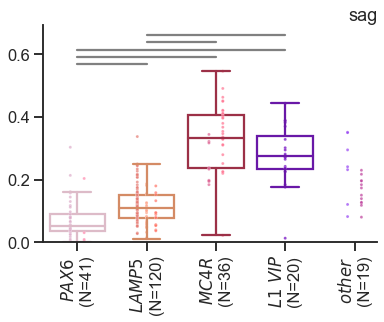

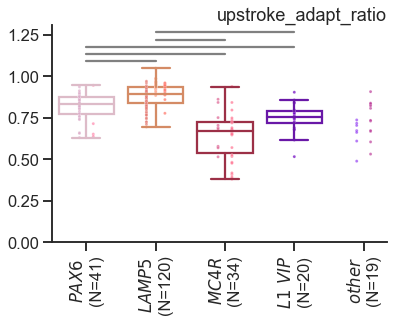

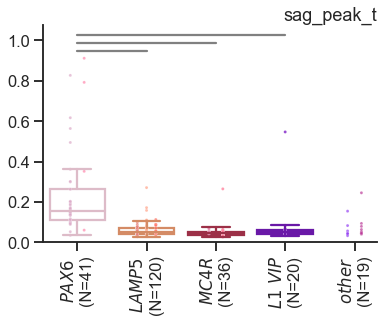

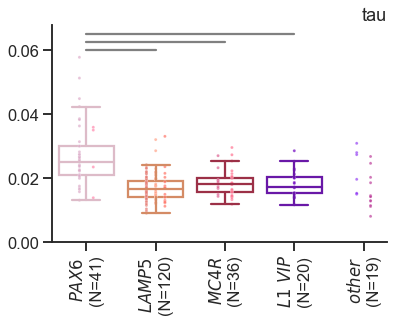

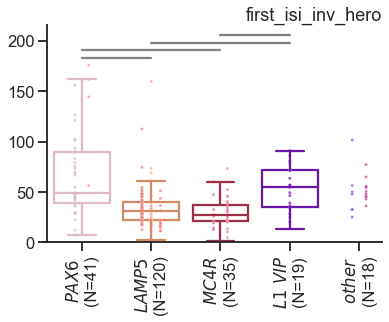

In [38]:
corr = complete_data[complete_features].corr(method='spearman')
features = utils.select_distinct(res.index, corr, nfeat=5, threshold=0.7)
for f in features:
    plot_single(data, f)

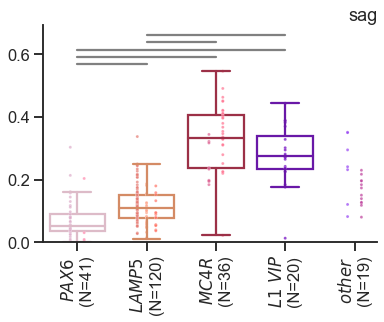

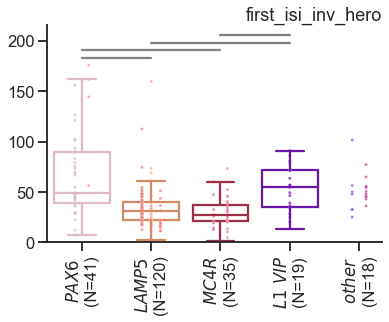

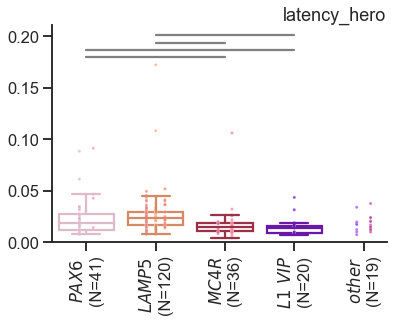

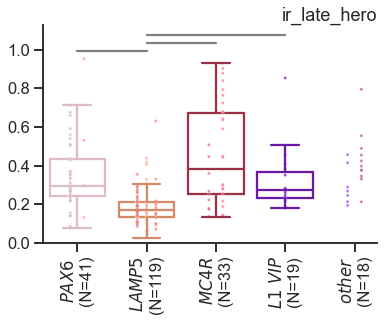

In [78]:
features = ['sag', 'first_isi_inv_hero', 'latency_hero', 'ir_late_hero']
for f in features:
    plot_single(data, f)

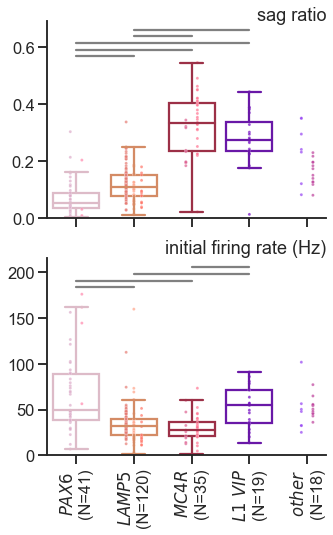

In [40]:
features = ['sag', 'first_isi_inv_hero']
labels = ['sag ratio', 'initial firing rate (Hz)']
plot_multiple(data, features, labels)

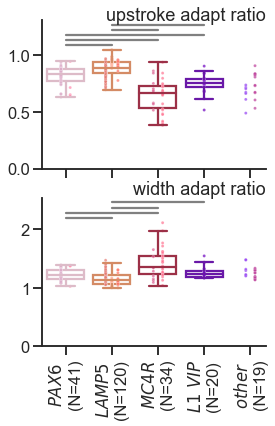

In [113]:
features = ['upstroke_adapt_ratio', 'width_adapt_ratio']
labels = [feature_name(x) for x in features]
utils.plot_boxplot_multiple(
    data, features, labels=labels, x='homology_type', x_fine=cluster, palette_fine=palette_human, palette=palette_subclass,
                                   pairs_sets=[pairs], test='dunn', drop_box='other', figsize=(4,6))

<AxesSubplot:xlabel='sag', ylabel='upstroke_adapt_ratio'>

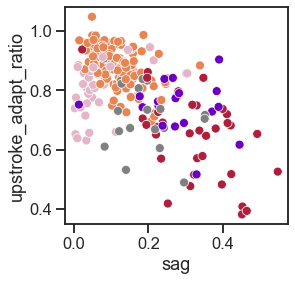

In [115]:
plt.subplots(figsize=(4,4))
sns.scatterplot(data=data, x='sag', y='upstroke_adapt_ratio', hue='homology_type', 
                palette=palette_subclass, legend=None)

### T-type

In [79]:
group_col = cluster
features = complete_features
subset = complete_data.query('core_l1_type').copy()
subset[group_col].cat.remove_unused_categories(inplace=True)
res = utils.run_kw_dunn(subset, features, group_col)
res.head(20)

,KW_H,pval_cluster,rsquared,epsilon2,pairs,ipairs,pair_count
feature,,,,,,,
upstroke_adapt_ratio,131.350665,3.183157e-23,0.600728,0.613788,"[(PAX6 CDH12, LAMP5 LCP2), (PAX6 CDH12, LAMP5 ...","[02, 03, 05, 06, 07, 12, 13, 24, 25, 26, 27, 3...",18
sag,122.144917,1.327986e-21,0.550933,0.565486,"[(PAX6 CDH12, LAMP5 NMBR), (PAX6 CDH12, SST CH...","[04, 05, 06, 07, 15, 16, 17, 24, 25, 26, 27, 3...",17
threshold_v_adapt_ratio,115.523869,2.115253e-20,0.524270,0.539831,"[(PAX6 CDH12, LAMP5 LCP2), (PAX6 CDH12, SST CH...","[02, 05, 06, 07, 12, 24, 25, 26, 27, 34, 35, 3...",15
width_adapt_ratio,97.222652,7.927760e-17,0.435858,0.454311,"[(PAX6 CDH12, LAMP5 LCP2), (PAX6 CDH12, LAMP5 ...","[02, 03, 06, 12, 23, 24, 25, 26, 27, 35, 36, 3...",14
downstroke_adapt_ratio,97.197092,7.927760e-17,0.435735,0.454192,"[(PAX6 CDH12, LAMP5 LCP2), (PAX6 CDH12, LAMP5 ...","[02, 03, 06, 12, 24, 25, 26, 27, 35, 36, 37, 4...",13
sag_peak_t,94.014574,2.989940e-16,0.416338,0.435253,"[(PAX6 CDH12, LAMP5 LCP2), (PAX6 CDH12, LAMP5 ...","[02, 03, 04, 05, 06, 07, 14, 15, 16, 17, 24, 2...",13
sag_area,90.066824,1.661135e-15,0.397449,0.416976,"[(PAX6 CDH12, LAMP5 NMBR), (PAX6 CDH12, SST CH...","[04, 05, 06, 07, 15, 16, 17, 24, 25, 26, 27, 3...",17
trough_slowdeltav_rheo,84.441796,2.067645e-14,0.370535,0.390934,"[(PAX6 CDH12, PAX6 TNFAIP8L3), (PAX6 CDH12, LA...","[01, 02, 03, 04, 07, 12, 13, 14, 16, 24, 25, 2...",19
ir_late_hero,80.054558,1.447091e-13,0.358111,0.379405,"[(PAX6 CDH12, LAMP5 LCP2), (PAX6 CDH12, LAMP5 ...","[02, 03, 04, 14, 26, 27, 36, 37, 45, 46, 47]",11


### Morpho

In [42]:
complete_data, clusters = subset_data(human_df, morph_features, ephys_frac_min=0, cluster_min=0)
data = complete_data.query('l1_type')
data['homology_type'].cat.remove_unused_categories(inplace=True)
data['homology_type'].value_counts(sort=False)

PAX6      21
LAMP5     34
MC4R      12
L1 VIP     5
other      7
Name: homology_type, dtype: int64

In [43]:
len(complete_data)

86

In [14]:
group_col = 'homology_type'
features = morph_features
subset = complete_data.query('core_l1_type').copy()
subset['homology_type'].cat.remove_unused_categories(inplace=True)
res = utils.run_kw_dunn(subset, features, group_col)
# res.to_csv('data/morph_kw_posthoc_dunn.csv')
res

,KW_H,pval_cluster,rsquared,epsilon2,pairs,ipairs,pair_count
feature,,,,,,,
basal_dendrite_calculate_number_of_stems,35.674738,0.000004,0.480511,0.502461,"[(PAX6, LAMP5), (LAMP5, MC4R), (LAMP5, L1 VIP)]","[01, 12, 13]",3
basal_dendrite_soma_percentile_y,25.104309,0.000374,0.325063,0.353582,"[(PAX6, MC4R), (PAX6, L1 VIP), (LAMP5, MC4R), ...","[02, 03, 12, 13]",4
axon_extent_x,22.903682,0.000719,0.292701,0.322587,"[(PAX6, MC4R), (LAMP5, MC4R), (MC4R, L1 VIP)]","[02, 12, 23]",3
axon_frac_above_basal_dendrite,21.548889,0.001032,0.272778,0.303505,"[(PAX6, MC4R), (LAMP5, MC4R), (MC4R, L1 VIP)]","[02, 12, 23]",3
axon_mean_contraction,20.178764,0.001590,0.252629,0.284208,"[(PAX6, LAMP5)]",[01],1
basal_dendrite_bias_y,17.694596,0.003854,0.216097,0.249220,"[(PAX6, MC4R), (LAMP5, MC4R)]","[02, 12]",2
axon_frac_below_basal_dendrite,17.611322,0.003854,0.214872,0.248047,"[(PAX6, MC4R), (LAMP5, MC4R)]","[02, 12]",2
axon_bias_x,16.923008,0.004673,0.204750,0.238352,"[(PAX6, MC4R), (PAX6, L1 VIP), (LAMP5, MC4R)]","[02, 03, 12]",3
basal_dendrite_num_branches,15.923291,0.006663,0.190048,0.224272,"[(PAX6, LAMP5), (LAMP5, MC4R), (LAMP5, L1 VIP)]","[01, 12, 13]",3


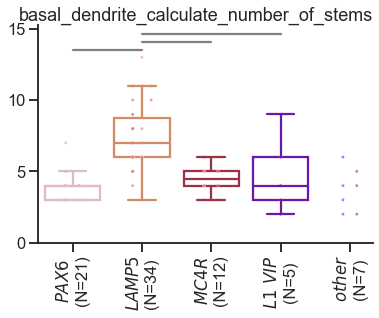

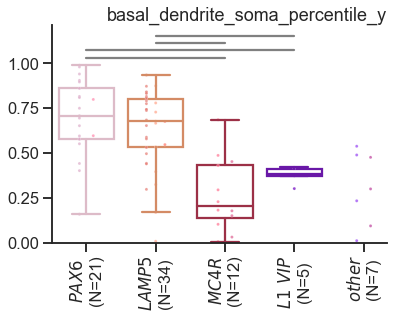

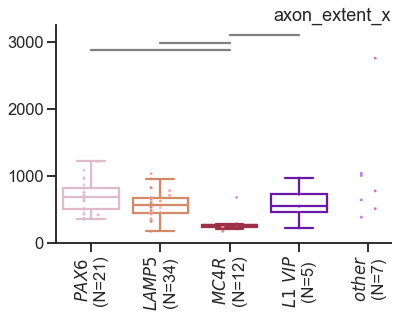

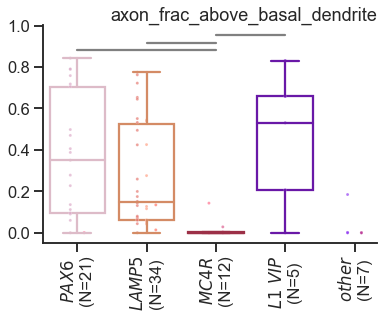

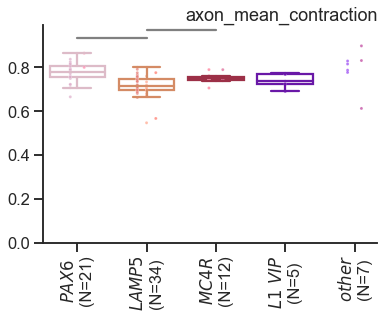

In [15]:
corr = complete_data[features].corr(method='spearman')
features = utils.select_distinct(res.index, corr, nfeat=5, threshold=0.7)
for f in features:
    plot_single(data, f)

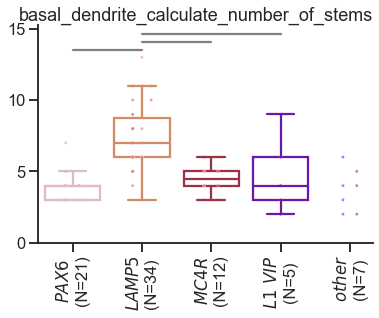

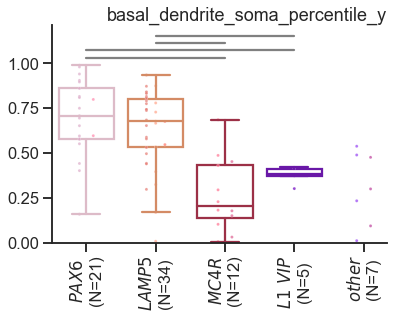

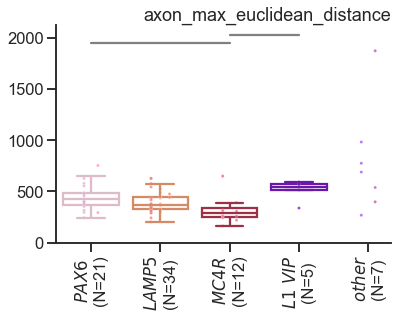

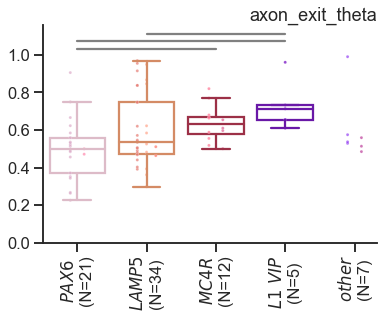

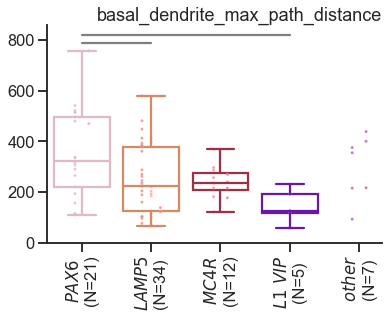

In [16]:
features = ['basal_dendrite_calculate_number_of_stems', 
            'basal_dendrite_soma_percentile_y',
            'axon_max_euclidean_distance', 
            'axon_exit_theta',
           'basal_dendrite_max_path_distance']
for f in features:
    plot_single(data, f)

In [17]:
reload(utils)

<module 'patchseq_utils.analysis' from '/home/tom.chartrand/work/patchseq_human_L1/patchseq_utils/analysis.py'>

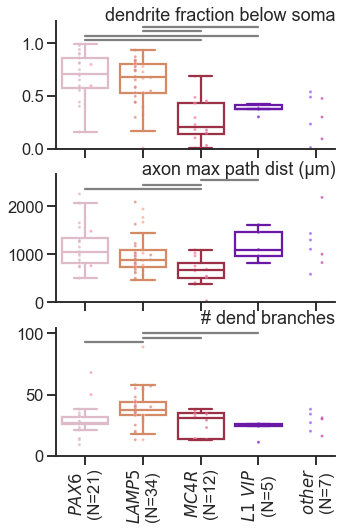

In [18]:
features = [
    'basal_dendrite_soma_percentile_y', 
    # 'axon_extent_x',
    'axon_max_path_distance', 
    'basal_dendrite_num_branches']
labels = [
    'dendrite fraction below soma', 
    # 'axon x extent (μm)', 
    'axon max path dist (μm)', 
    '# dend branches']
plot_multiple(data, features, labels=labels)


No handles with labels found to put in legend.


Text(0, 0.5, 'axon max distance')

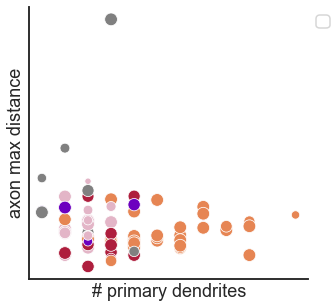

In [19]:
from patchseq_utils.plotting import plot_scatter
plot_scatter(data=complete_data, x='basal_dendrite_calculate_number_of_stems', y='axon_max_euclidean_distance',
             hue='homology_type', size='topLeafValue', palette=palette_subclass,
             figsize=(5,5), legend=False)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.xlabel('# primary dendrites')
plt.ylabel('axon max distance')

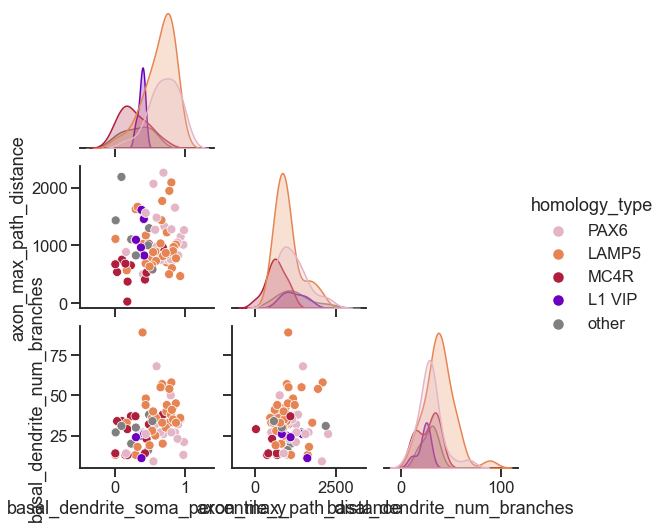

In [20]:
sns.pairplot(data, hue='homology_type', palette=palette_subclass, vars=features, corner=True)

## Mouse

In [166]:
plot_single = lambda data, f: utils.plot_box_cluster_feature(
    data, f, 'homology_type', x_fine=cluster, palette_fine=palette_mouse, palette=palette_subclass,
                                   pairs_sets=[pairs], test='dunn', drop_box='other')
plot_multiple = lambda data, features, labels=None: utils.plot_boxplot_multiple(
    data, features, labels=labels, x='homology_type', x_fine=cluster, palette_fine=palette_mouse, palette=palette_subclass,
                                   pairs_sets=[pairs], test='dunn', drop_box='other', figsize=(5,8))

### Ephys

In [169]:
features = ephys_features
group_col = 'homology_type'
complete_data, clusters = subset_data(mouse_df, features, ephys_frac_min=0, cluster_min=0)
# replace with min across groups?
# complete_features = (complete_data.groupby(group_col, observed=True)[features].apply(lambda df:
#                      df.notna().mean(axis=0)).min(axis=0).loc[lambda x: x>0.4].index)
complete_features = subset_features(complete_data, ephys_features, complete_frac=0.4)
data = complete_data.query('l1_type')
data['homology_type'].cat.remove_unused_categories(inplace=True)
data['homology_type'].value_counts(sort=False)

PAX6        5
LAMP5     406
MC4R       25
L1 VIP     95
Name: homology_type, dtype: int64

In [170]:
data.shape[0]

531

In [158]:
set(ephys_features).difference(complete_features)

{'3db_freq_chirp',
 'adp_v_last_rheo',
 'low_freq_impedance_chirp',
 'peak_freq_chirp',
 'peak_impedance_chirp',
 'peak_ratio_chirp',
 'phase_low_chirp',
 'phase_peak_chirp',
 'sag_tau',
 'sag_tau_depol',
 'sync_freq_chirp',
 'total_inductive_phase_chirp'}

In [160]:
reload(utils)

<module 'patchseq_utils.analysis' from '/home/tom.chartrand/work/patchseq_human_L1/patchseq_utils/analysis.py'>

In [161]:
features = complete_features
res = utils.run_kw_dunn(data, features, group_col)
# res.to_csv('data/ephys_kw_posthoc_dunn.csv')
res.head(30)

,KW_H,pval_cluster,rsquared,epsilon2,pairs,ipairs,pair_count
feature,,,,,,,
tau,240.352897,6.386781e-50,0.456448,0.459566,"[(PAX6, LAMP5), (LAMP5, MC4R), (LAMP5, L1 VIP)...","[01, 12, 13, 23]",4
input_resistance,237.403574,1.386854e-49,0.449911,0.453060,"[(PAX6, LAMP5), (LAMP5, MC4R), (LAMP5, L1 VIP)...","[01, 12, 13, 23]",4
postap_slope_hero,223.226556,1.074443e-46,0.422700,0.426005,"[(LAMP5, MC4R), (LAMP5, L1 VIP)]","[12, 13]",2
first_isi_inv_hero,222.375025,1.231204e-46,0.435268,0.438610,"[(PAX6, LAMP5), (LAMP5, MC4R), (LAMP5, L1 VIP)...","[01, 12, 13, 23]",4
adapt_mean,220.292568,2.777121e-46,0.420295,0.423640,"[(PAX6, LAMP5), (LAMP5, MC4R), (LAMP5, L1 VIP)...","[01, 12, 13, 23]",4
input_resistance_ss,219.730382,3.061546e-46,0.415989,0.419333,"[(LAMP5, MC4R), (LAMP5, L1 VIP), (MC4R, L1 VIP)]","[12, 13, 23]",3
adapt_hero,207.314266,1.097163e-44,0.419866,0.422229,"[(LAMP5, MC4R), (LAMP5, L1 VIP), (MC4R, L1 VIP)]","[01, 02, 12]",3
trough_slowdeltav_hero,210.350085,2.446363e-44,0.397985,0.401431,"[(LAMP5, MC4R), (LAMP5, L1 VIP)]","[12, 13]",2
isi_adapt_ratio,205.400271,2.553201e-43,0.397643,0.401172,"[(PAX6, LAMP5), (LAMP5, MC4R), (LAMP5, L1 VIP)...","[01, 12, 13, 23]",4


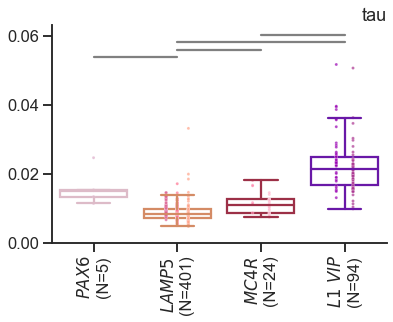

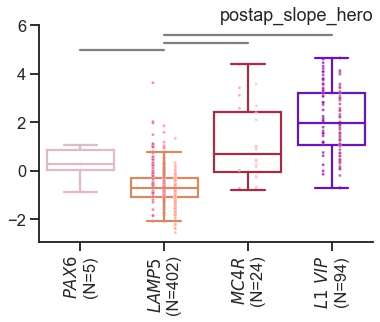

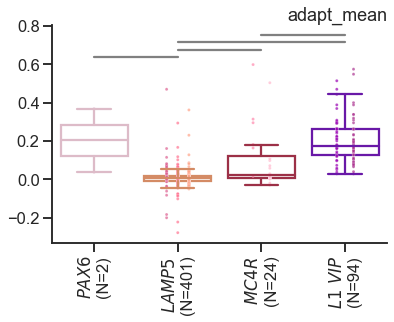

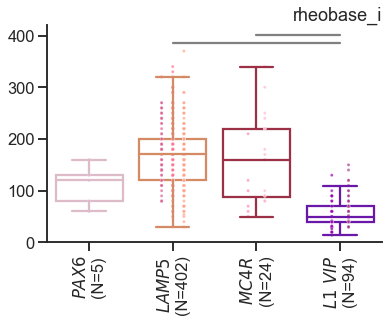

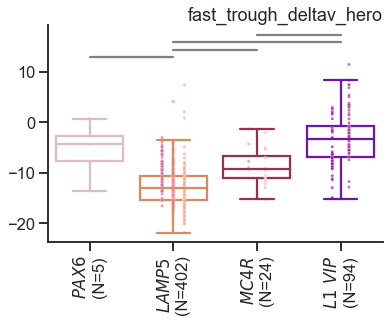

In [167]:
corr = complete_data[complete_features].corr(method='spearman')
features = utils.select_distinct(res.index, corr, nfeat=5, threshold=0.7)
for f in features:
    plot_single(data, f)

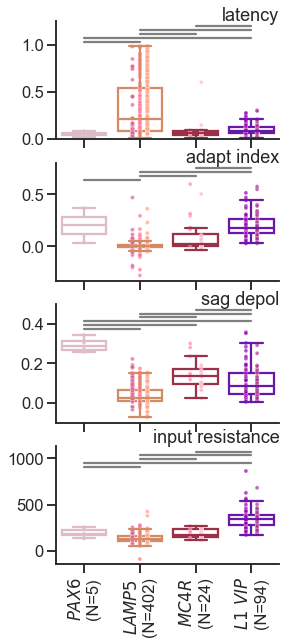

In [164]:
features = [
    'latency_rheo',
    'adapt_mean',
    'sag_depol',
    'input_resistance'
]
utils.plot_boxplot_multiple(data, features, 'homology_type', labels=feature_name, 
                            x_fine=cluster, palette_fine=palette_mouse, palette=palette_subclass,
                                   pairs_sets=[pairs], size=4, figsize=(4,10)) 

### Morpho

In [171]:
complete_data, clusters = subset_data(mouse_df, morph_features, ephys_frac_min=0, cluster_min=0)
data = complete_data.query('l1_type')
data['homology_type'].cat.remove_unused_categories(inplace=True)
data['homology_type'].value_counts(sort=False)

PAX6       1
LAMP5     54
MC4R       6
L1 VIP    15
Name: homology_type, dtype: int64

In [172]:
data.shape[0]

76

In [150]:
group_col = 'homology_type'
features = morph_features
subset = complete_data.query('core_l1_type').copy()
subset['homology_type'].cat.remove_unused_categories(inplace=True)
res = utils.run_kw_dunn(subset, features, group_col)
# res.to_csv('data/morph_kw_posthoc_dunn.csv')
res

,KW_H,pval_cluster,rsquared,epsilon2,pairs,ipairs,pair_count
feature,,,,,,,
basal_dendrite_frac_above_axon,46.796839,1.958004e-08,0.608289,0.623958,"[(LAMP5, L1 VIP), (MC4R, L1 VIP)]","[13, 23]",2
basal_dendrite_num_branches,29.801994,3.873320e-05,0.372250,0.397360,"[(LAMP5, MC4R), (LAMP5, L1 VIP)]","[12, 13]",2
axon_soma_percentile_y,23.813777,3.657910e-04,0.289080,0.317517,"[(PAX6, L1 VIP), (LAMP5, L1 VIP), (MC4R, L1 VIP)]","[03, 13, 23]",3
basal_dendrite_frac_intersect_axon,23.711915,3.657910e-04,0.287665,0.316159,"[(LAMP5, L1 VIP)]",[13],1
axon_emd_with_basal_dendrite,22.550444,4.144682e-04,0.271534,0.300673,"[(LAMP5, L1 VIP), (MC4R, L1 VIP)]","[13, 23]",2
axon_frac_above_basal_dendrite,22.719607,4.144682e-04,0.273883,0.302928,"[(LAMP5, L1 VIP)]",[13],1
basal_dendrite_extent_x,22.285578,4.144682e-04,0.267855,0.297141,"[(LAMP5, MC4R), (LAMP5, L1 VIP)]","[12, 13]",2
axon_num_branches,21.945795,4.267889e-04,0.263136,0.292611,"[(LAMP5, L1 VIP)]",[13],1
basal_dendrite_calculate_number_of_stems,20.766442,6.670375e-04,0.246756,0.276886,"[(LAMP5, L1 VIP)]",[13],1


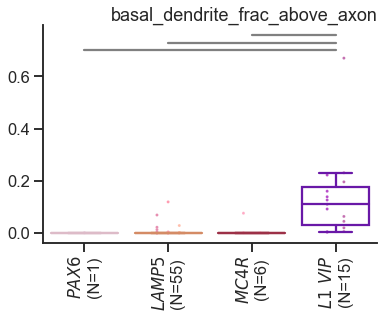

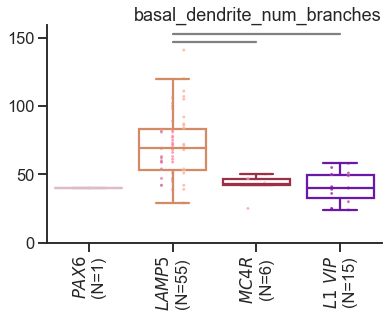

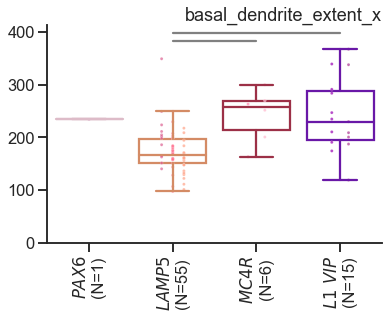

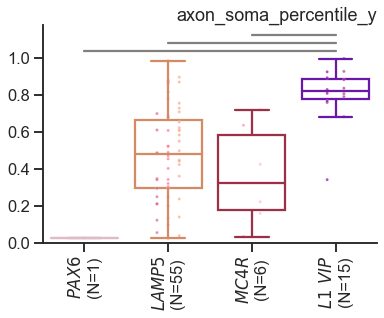

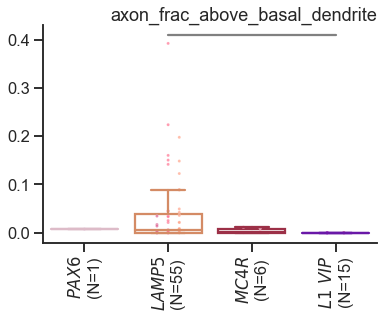

In [29]:
corr = complete_data[features].corr(method='spearman')
features = utils.select_distinct(res.index, corr, nfeat=5, threshold=0.7)
for f in features:
    plot_single(data, f)

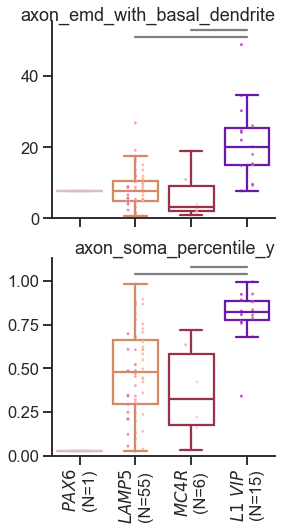

In [124]:
features = [
    'axon_emd_with_basal_dendrite',
    'axon_soma_percentile_y'
]
utils.plot_boxplot_multiple(data, features, 'homology_type', x_fine=cluster, palette_fine=palette_mouse, palette=palette_subclass,
                                   pairs_sets=[pairs]) 

In [134]:
reload(utils)

<module 'patchseq_utils.analysis' from '/home/tom.chartrand/work/patchseq_human_L1/patchseq_utils/analysis.py'>

/tmp/ipykernel_26999/782543218.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['axon_tortuosity'] = 1/data['axon_mean_contraction']


(1.0, 1.4163383192315806)

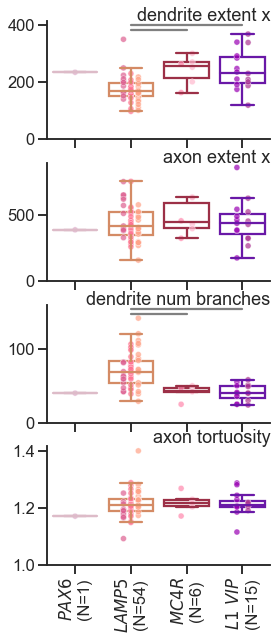

In [151]:
features = [
    'basal_dendrite_extent_x',
    'axon_extent_x',
    'basal_dendrite_num_branches',
    'axon_tortuosity',
]
data['axon_tortuosity'] = 1/data['axon_mean_contraction']
utils.plot_boxplot_multiple(data, features, 'homology_type', labels=feature_name, 
                            x_fine=cluster, palette_fine=palette_mouse, palette=palette_subclass,
                                   pairs_sets=[pairs], size=6, figsize=(4,10)) 
plt.ylim(1, None)